In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pymannkendall as mk
import pandas as pd
import statsmodels.api as sm

In [2]:
dataset_path = "data\cdf\Monthly.v3.1-19930101-20231231.nc"
data = xr.open_dataset(dataset_path)

In [3]:
data = data['rfe'].groupby('time.year').mean('time')

In [4]:
output = []
for i in np.arange(len(data.lat.values)):
    for j in np.arange(len(data.lon.values)):
        try:
            trend_value=mk.original_test(data[:,i,j], alpha=0.05).trend
        except:
            trend_value=-9999
        output.append(trend_value)

In [5]:
output=np.copy(output).reshape(data.lat.size,data.lon.size)

In [6]:
pos_trends = ['decreasing', 'no trend', 'increasing']
output[output==pos_trends[2]]=1
output[output==pos_trends[1]]=0
output[output==pos_trends[0]]=-1
output=np.int_(output)

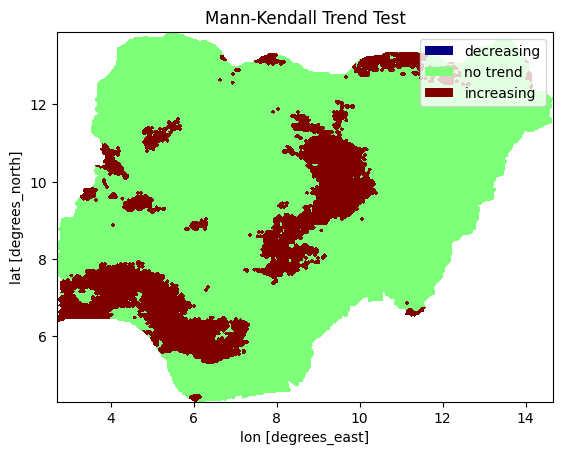

In [7]:
trends=xr.DataArray(output, dims=('lat', 'lon'), coords={'lat': data.lat, 'lon': data.lon}, name='trend')
cs = trends.where(trends>-9999).plot.contourf(cmap='jet', levels=[-2,-1,0,1], add_colorbar=False)
artists, labels = cs.legend_elements()
plt.title("Mann-Kendall Trend Test")
plt.legend(handles=artists, labels=pos_trends)